In [1]:
#import necessary libraries
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Business Understanding

Black Friday is the 'official' kick off to the holiday shopping season, the most important shopping period. The 2018 Black Friday opened a shopping season which became the highest U.S. ecommerce sales day in history with $7.9 billion in revenue.  It's important for the sellers to look into the history sales data and prepare early for the next shopping season so as not to lose the grain. 

I'm going to perform some exploration on Black Friday Dataset From Kaggle. The task or questions I will target for as below:

Question 1: Which User spent most during black Friday, list the top 20 spending users

Question 2: How about the User Distribution by Age Group? And also consider Gender

Question 3: Which products are most popular during Black Friday, list the top 20

Question 4: Look at the users again, this time focus on group by Occupation in different city

Question 5: Correlation between Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x vs Purchase

Understanding these questions may provide some advice for the sellers to better understand the customer purchase behaviour against different products so that the seller can prepare for the next shopping season well.

### Data Understanding
This project will use Black Friday Dataset From Kaggle, which is a sample of the transactions made in a retail store. 

Below are the steps to look at and understand the dataset.

In [2]:
# Read in the Complete Dataset
BlackFriday_Dataset = pd.read_csv('./BlackFriday.csv')
BlackFriday_Dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Get the Basic info of the dataset
BlackFriday_Dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
BlackFriday_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
num_rows = BlackFriday_Dataset.shape[0] #Provide the number of rows    in the dataset
num_cols = BlackFriday_Dataset.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 537577
Column number: 12


In [6]:
# To check the column names in the dataset
BlackFriday_Dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Prepare Data
Some data preparation steps need to be done before using the dataset for exploration, including：
1. Checking columns with missing values and analyze impact
2. Dealing with missing values
3. One-Hot Encoding for Categorical variables such as Club, Nationality, Preferred Positions

In [7]:
# Data Preparation Step 1: check how many missing values are in the dataset
BlackFriday_Dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

After check, missing values only exist in column "Product_Category_2" & "Product_Category_3". From the describe of the dataset, the min values of "Product_Category_2" & "Product_Category_3" are non-zero. My understanding is that the missing value in "Product_Category_2" & "Product_Category_3" means the customer didn't purchase products in these two category. Thus we can use "0" to fill in the missing value.

In [8]:
# Data Preparation Step 2: Fill the missing cell with zero
BlackFriday_Dataset.fillna(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [9]:
# Data Preparation Step 3: One-Hot Encoding for Categorical variables
# One-hot encode the feature:  Gender, Age, City_Category, Stay_in_curent_City_Years
le = LabelEncoder()
BlackFriday_Dataset['Gender_onehot_encode']              = le.fit_transform(BlackFriday_Dataset['Gender'].astype(str))
BlackFriday_Dataset['Age_onehot_encode']                 = le.fit_transform(BlackFriday_Dataset['Age'].astype(str))
BlackFriday_Dataset['City_Category_onehot_encode']       = le.fit_transform(BlackFriday_Dataset['City_Category'].astype(str))
BlackFriday_Dataset['Stay_In_Current_City_Years_encode'] = le.fit_transform(BlackFriday_Dataset['Stay_In_Current_City_Years'].astype(str))

In [10]:
BlackFriday_Dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_onehot_encode,Age_onehot_encode,City_Category_onehot_encode,Stay_In_Current_City_Years_encode
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1,6,2,4


### Answer Questions base on dataset
I have come up some question to be answered by the Data exploration

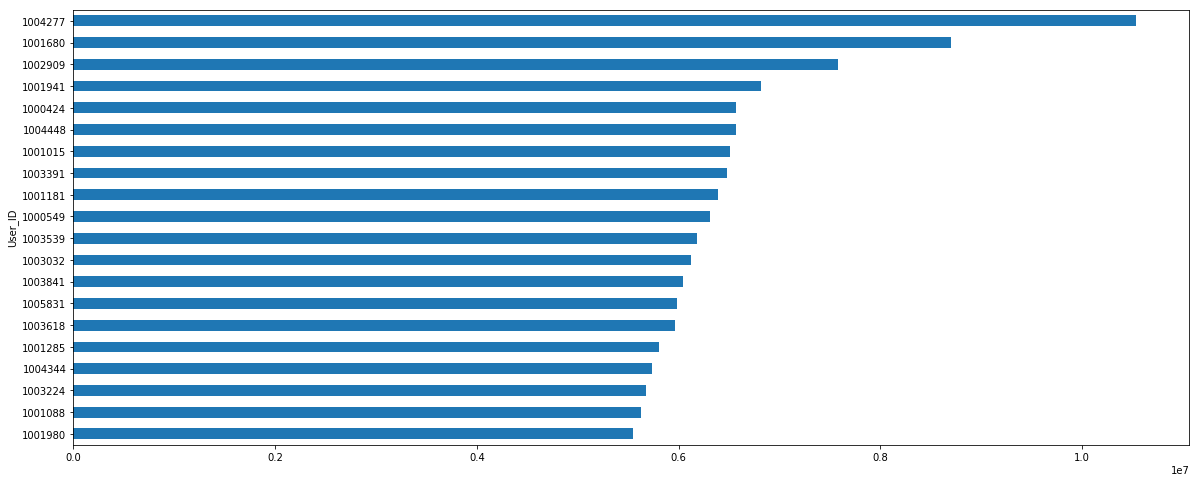

In [11]:
# Question 1: Which User spent most during black Friday, list the top 20 spending users
plt.figure(figsize = (20,8))
BlackFriday_Dataset.groupby('User_ID')['Purchase'].sum().nlargest(20).sort_values().plot('barh')

It's important for the seller to identify high quality customers. These customers with higher purchase amount should be valued. Understanding the needs of these customers will help the merchant to make more suitable operational decisions, such as product type, pricing, after-sales, etc. Loyalty promgram, advertisments should be made to keep these customers continuing shopping with the merchant.

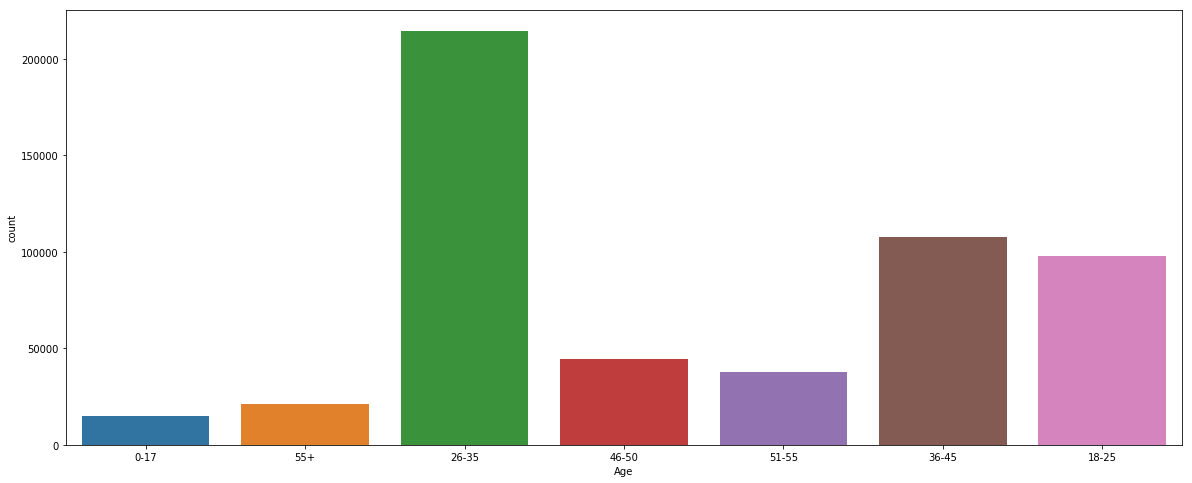

In [12]:
# Question 2: How about the User Distribution by Age Group? And also consider Gender
plt.figure(figsize = (20,8))
sns.countplot(BlackFriday_Dataset['Age'])

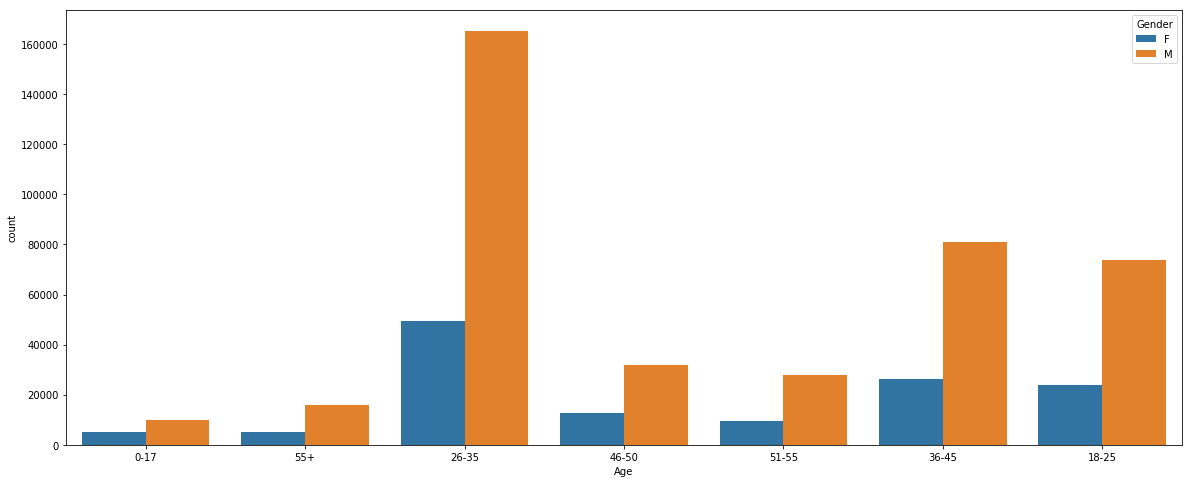

In [13]:
plt.figure(figsize = (20,8))
sns.countplot(BlackFriday_Dataset['Age'],hue=BlackFriday_Dataset['Gender'])

We can find from the plot that most of the users who participate in the Black Friday Sale are from age group 26-35, 36-45 and 18-25, which is reasonable as these customers are in the golden age of their life.They make more money than other age groups, and they also have more shopping needs comparing to other age groups.

From the second plot, we can find for all age group, Male customers shop more comparing to Female customers. I think this is because that the most worthwhile things to buy on the Black Friday are electrical appliances, small appliances, and game consoles. Apple products, especially iPad, the price of Black Five is the best in a year.Obviously such products are more popular with male customers.

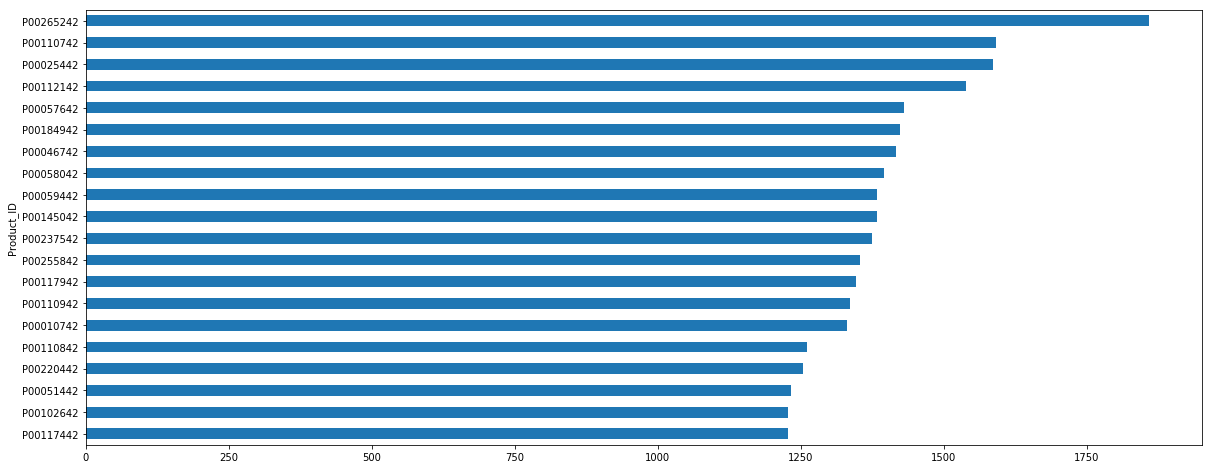

In [14]:
# Question 3: Which products are most popular during Black Friday, list the top 20
plt.figure(figsize = (20,8))
BlackFriday_Dataset.groupby('Product_ID')['Purchase'].count().nlargest(20).sort_values().plot('barh')

List out the most popular products may help the merchant adjust their business strategy and can prepare for the next shopping season better so that to Increase revenue and profit.

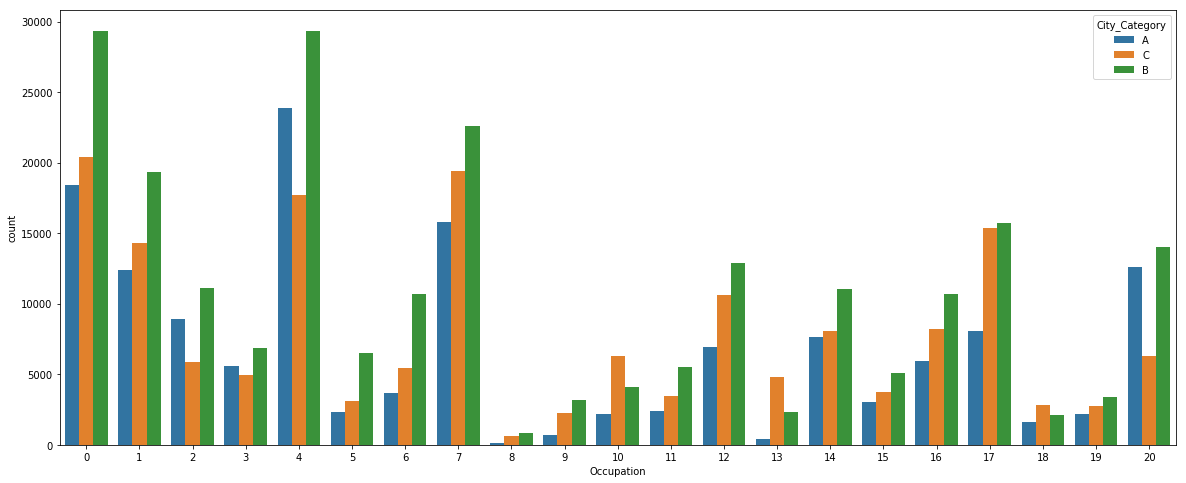

In [15]:
# Question 4: Look at the users again, this time focus on group by Occupation in different city
plt.figure(figsize = (20,8))
sns.countplot(BlackFriday_Dataset['Occupation'], hue = BlackFriday_Dataset["City_Category"])

The plot shows that for almost all Occupation Category, users from Citi B did more shopping compring to users from City A & Citi C. I think the reason is City B is larger than City A & Citi C and thus has a larger population. And customers from occupation 0, 4, 7 did more shopping than other occupations.

In [16]:
# Question 5: Correlation between Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x vs Purchase
Correlation_DF = BlackFriday_Dataset[['Gender_onehot_encode', 'Age_onehot_encode', 'Occupation', 'City_Category_onehot_encode', 
    'Stay_In_Current_City_Years_encode', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
Correlation_DF.corr()

,Gender_onehot_encode,Age_onehot_encode,Occupation,City_Category_onehot_encode,Stay_In_Current_City_Years_encode,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender_onehot_encode,1.000000,-0.004413,0.117294,-0.004129,0.015392,-0.010379,-0.045661,-0.018440,0.028403,0.060086
Age_onehot_encode,-0.004413,1.000000,0.091898,0.122308,-0.004754,0.312079,0.061951,0.054762,0.057155,0.017717
Occupation,0.117294,0.091898,1.000000,0.033781,0.031203,0.024691,-0.008114,-0.000031,0.013452,0.021104
City_Category_onehot_encode,-0.004129,0.122308,0.033781,1.000000,0.019948,0.040173,-0.027444,-0.012120,-0.002672,0.068507
Stay_In_Current_City_Years_encode,0.015392,-0.004754,0.031203,0.019948,1.000000,-0.012663,-0.004182,-0.001781,0.002039,0.005470
Marital_Status,-0.010379,0.312079,0.024691,0.040173,-0.012663,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,-0.045661,0.061951,-0.008114,-0.027444,-0.004182,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,-0.018440,0.054762,-0.000031,-0.012120,-0.001781,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.028403,0.057155,0.013452,-0.002672,0.002039,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.060086,0.017717,0.021104,0.068507,0.005470,0.000129,-0.314125,-0.209973,-0.022257,1.000000


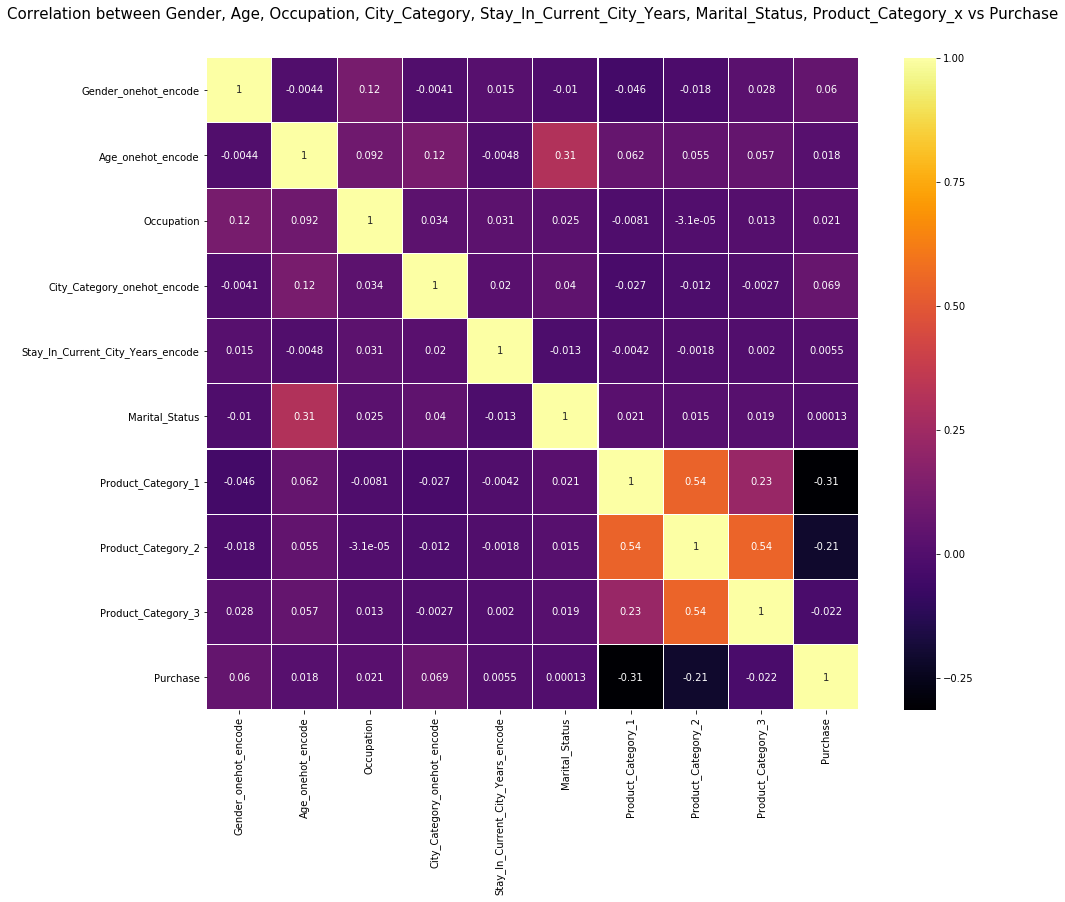

In [17]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x vs Purchase', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

From the correlation heatmap above, we can conclude that Gender & City_Category are most postive related to Purchase comparing to other features, while all Product_Category features are negative related to Purchase. Marital_Status, Stay_In_Current_City_Years are not so important features that relate to Purchase. All three Product_Category are highly correlated to each other. Besides that, we can also find that Martital_Status are highly related to Age, which is quite reasonable.